<a href="https://colab.research.google.com/github/RenSuKu/idat-pipeline/blob/master/PracticaML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Presentacion de la Practica ML
####Crear un modelo que prediga si un cliente se va o no.


#Primeros subimos  el archivo excel

In [ ]:
from google.colab import files
files.upload()


Saving dataset_desercion_telefonia.xlsx to dataset_desercion_telefonia.xlsx


{'dataset_desercion_telefonia.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00m\xb6;\\F\xc7MH\x95\x00\x00\x00\xcd\x00\x00\x00\x10\x00\x00\x00docProps/app.xmlM\xcfM\x0b\xc20\x0c\x06\xe0\xbfRv\xb7\x99\x8a\x1e\xa4\x0eD=\x8a\x9e\xbc\xcf.u\x85\xb6)m\x84\xfa\xef\xed\x04?nyy\xc8\x1b\xa2.\x89"&\xb6\x98E\xf1.\xe4m32\xc7\r@\xd6#\xfa>\xcb\xca\xa1\x8a\xa1\xe4{\xae1\xdd\x81\x8c\xb1\x1a\x0f\xa4\x1f\x1e\x03\xc3\xa2m\xd7\x80\x851\x0c8\xcc\xe2\xb7\xb0\xe9\xd4.Fgu\xcf\x96Bw\xb2:Q&\xc3\xe2X4:\xb1\'\x1f\xab\xdc\x1c\n\x10\xe7z%>\x8b\x13K9\x97+\x05\xff\x8bS\xcb\x15S\x9e\xe6\xcao\xfcd\x05\xbf\x07\xba\x17PK\x03\x04\x14\x00\x00\x00\x08\x00m\xb6;\\\xc8y\xcbA\xf1\x00\x00\x00+\x02\x00\x00\x11\x00\x00\x00docProps/core.xml\xcd\x92QK\xc30\x10\xc7\xbf\x8a\xe4\xbd\xbd6c\x15B\x97\x97\x89O\n\x82\x03\xc5\xb7\x90\xdc\xb6`\x93\x86\xe4\xa4\xdd\xb77\xad[\xa7\xe8\x07\xf01w\xff\xfc\xeewp\xad\x0eB\xf7\x11\x9fb\x1f0\x92\xc5t3\xba\xce\'\xa1\xc3\x86\x1d\x89\x82\x00H\xfa\x88N\xa52\'|n\xee\xfb\xe8\x14\xe5g<@P\xfa]\x1d\x10xU5\xe0\x90\x94Q

#Segundo Cargar el Excel

In [ ]:
import pandas as pd

df = pd.read_excel("dataset_desercion_telefonia.xlsx")
df.head()


,edad,sexo,antiguedad_meses,tipo_plan,costo_mensual,consumo_datos_gb,consumo_llamadas_min,cantidad_reclamos,tiene_fibra_optica,tiene_tv_cable,tipo_contrato,metodo_pago,nivel_satisfaccion,promociones_activas,deserto
0,56,Femenino,61,Postpago Básico,62.59,9.0,1314,1,1,1,Bianual,Tarjeta,2,1,0
1,69,Femenino,92,Postpago Premium,70.21,8.5,850,1,1,0,Anual,Débito automático,1,0,0
2,46,Masculino,93,Postpago Básico,168.27,1.4,837,0,0,0,Anual,Tarjeta,5,0,0
3,32,Masculino,9,Postpago Premium,60.71,44.1,167,1,1,0,Bianual,Tarjeta,10,0,1
4,60,Femenino,116,Prepago,69.83,77.9,949,2,1,1,Mensual,Débito automático,5,1,0


#Tercero reviso las columnas

In [ ]:
df.columns


Index(['edad', 'sexo', 'antiguedad_meses', 'tipo_plan', 'costo_mensual',
       'consumo_datos_gb', 'consumo_llamadas_min', 'cantidad_reclamos',
       'tiene_fibra_optica', 'tiene_tv_cable', 'tipo_contrato', 'metodo_pago',
       'nivel_satisfaccion', 'promociones_activas', 'deserto'],
      dtype='object')

#Cuarto  hago una limpieza

In [ ]:
df = df.dropna()


#Quinto Convierto  el texto en numeros

In [ ]:
df = pd.get_dummies(df, drop_first=True)


#Sexto Separo las variables


In [ ]:
y = df["deserto"]
X = df.drop("deserto", axis=1)



#Septimo la division de datos

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


#Octavo el Escalado de Datos

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Noveno Crear los Modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


#Decima Entrenar y evaluar los modelos

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(name)
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("F1:", round(f1_score(y_test, y_pred), 3))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 3))
    print("-" * 30)


Regresión Logística
Accuracy: 0.728
F1: 0.114
ROC-AUC: 0.637
------------------------------
Árbol de Decisión
Accuracy: 0.59
F1: 0.305
ROC-AUC: 0.508
------------------------------
Random Forest
Accuracy: 0.725
F1: 0.141
ROC-AUC: 0.614
------------------------------
KNN
Accuracy: 0.677
F1: 0.246
ROC-AUC: 0.535
------------------------------
Gradient Boosting
Accuracy: 0.713
F1: 0.258
ROC-AUC: 0.622
------------------------------


#Undecima Modelo de tablas

Tabla de resultados de los modelos:


,Modelo,Accuracy,F1,ROC-AUC
0,Regresión Logística,0.728,0.114,0.637
1,Árbol de Decisión,0.590,0.305,0.508
2,Random Forest,0.725,0.141,0.614
3,KNN,0.677,0.246,0.535
4,Gradient Boosting,0.713,0.258,0.622


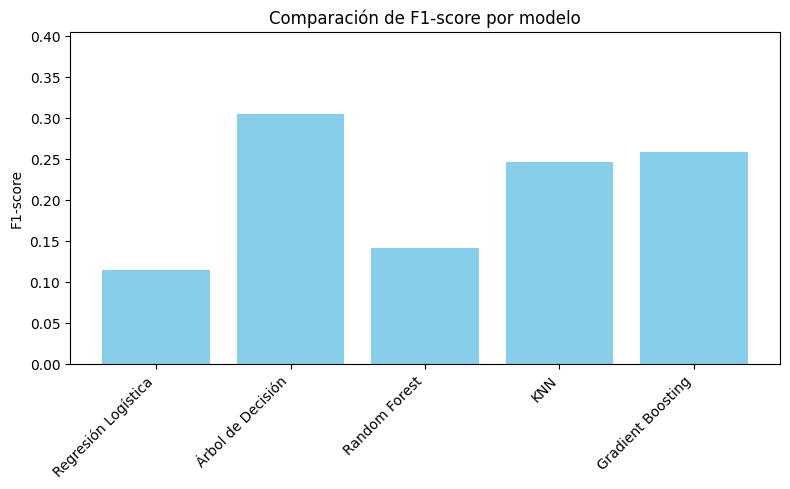

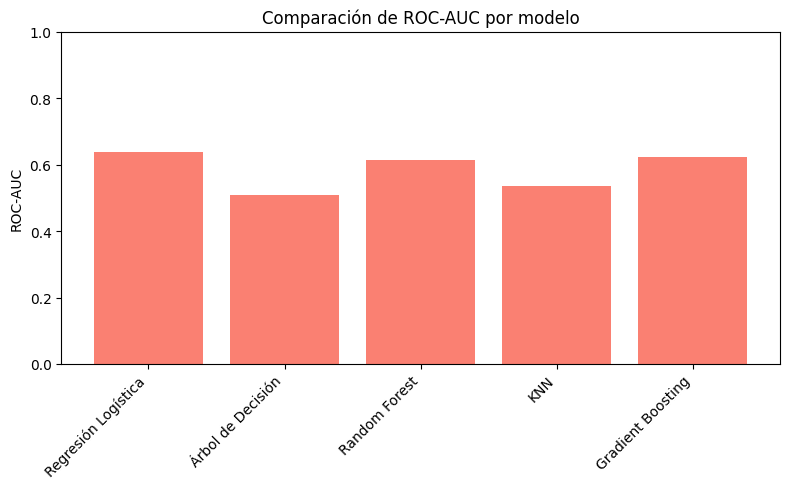

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


results = pd.DataFrame({
    "Modelo": [
        "Regresión Logística",
        "Árbol de Decisión",
        "Random Forest",
        "KNN",
        "Gradient Boosting"
    ],
    "Accuracy": [0.728, 0.590, 0.725, 0.677, 0.713],
    "F1": [0.114, 0.305, 0.141, 0.246, 0.258],
    "ROC-AUC": [0.637, 0.508, 0.614, 0.535, 0.622]
})


print("Tabla de resultados de los modelos:")
display(results)


plt.figure(figsize=(8,5))
plt.bar(results["Modelo"], results["F1"], color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.title("Comparación de F1-score por modelo")
plt.ylabel("F1-score")
plt.ylim(0, max(results["F1"])+0.1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.bar(results["Modelo"], results["ROC-AUC"], color='salmon')
plt.xticks(rotation=45, ha="right")
plt.title("Comparación de ROC-AUC por modelo")
plt.ylabel("ROC-AUC")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
